In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
hr = pd.read_csv("hr_data.csv")
hr.tail()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14994,87670,2,151,3,0,1,0,support,low
14995,87673,2,160,3,0,1,0,support,low
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low
14998,87684,2,158,3,0,1,0,support,low


In [3]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [4]:
emp = pd.read_excel("employee_satisfaction_evaluation.xlsx")
emp.tail()

,EMPLOYEE #,satisfaction_level,last_evaluation
14994,87670,0.40,0.57
14995,87673,0.37,0.48
14996,87679,0.37,0.53
14997,87681,0.11,0.96
14998,87684,0.37,0.52


In [5]:
emp = emp.rename(columns={"EMPLOYEE #":"employee_id"})

In [6]:
df = pd.merge(hr,emp,on="employee_id")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            14999 non-null  int64  
 1   number_project         14999 non-null  int64  
 2   average_montly_hours   14999 non-null  int64  
 3   time_spend_company     14999 non-null  int64  
 4   Work_accident          14999 non-null  int64  
 5   left                   14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   satisfaction_level     14972 non-null  float64
 10  last_evaluation        14972 non-null  float64
dtypes: float64(2), int64(7), object(2)
memory usage: 1.4+ MB


In [8]:
df.isnull().sum()

employee_id               0
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
department                0
salary                    0
satisfaction_level       27
last_evaluation          27
dtype: int64

In [9]:
df.nunique()

employee_id              14999
number_project               6
average_montly_hours       215
time_spend_company           8
Work_accident                2
left                         2
promotion_last_5years        2
department                  10
salary                       3
satisfaction_level          92
last_evaluation             65
dtype: int64

In [10]:
df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df.fillna(df.mean,inplace=True)

In [12]:
df.drop(columns="employee_id",inplace=True)

In [13]:
df.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.8,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


In [14]:
mean_left_by_dpt = df.groupby("department")["left"].mean().sort_values(ascending=False)

In [15]:
mean_left_by_salary = df.groupby("salary")["left"].mean().sort_values(ascending=False)

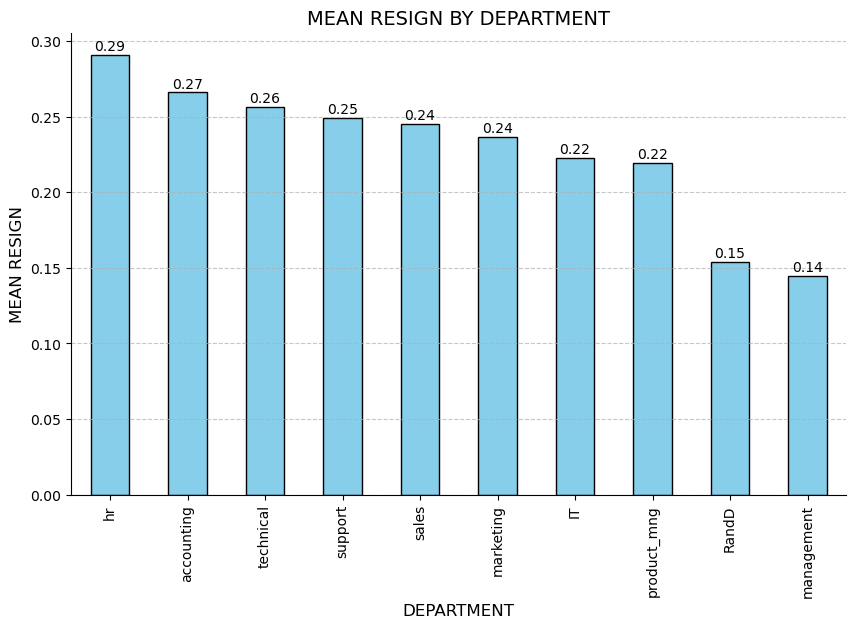

In [16]:
ax = mean_left_by_dpt.plot(kind="bar", color="skyblue", edgecolor="black", figsize=(10, 6))

# Add labels and title
ax.set_xlabel("DEPARTMENT", fontsize=12)
ax.set_ylabel("MEAN RESIGN", fontsize=12)
ax.set_title("MEAN RESIGN BY DEPARTMENT", fontsize=14)

# Add grid
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Customize the appearance of the plot
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Add data labels
for i, value in enumerate(mean_left_by_dpt):
    ax.text(i, value + 0.001, f"{value:.2f}", ha="center", va="bottom", fontsize=10)

# Show the plot
plt.show()

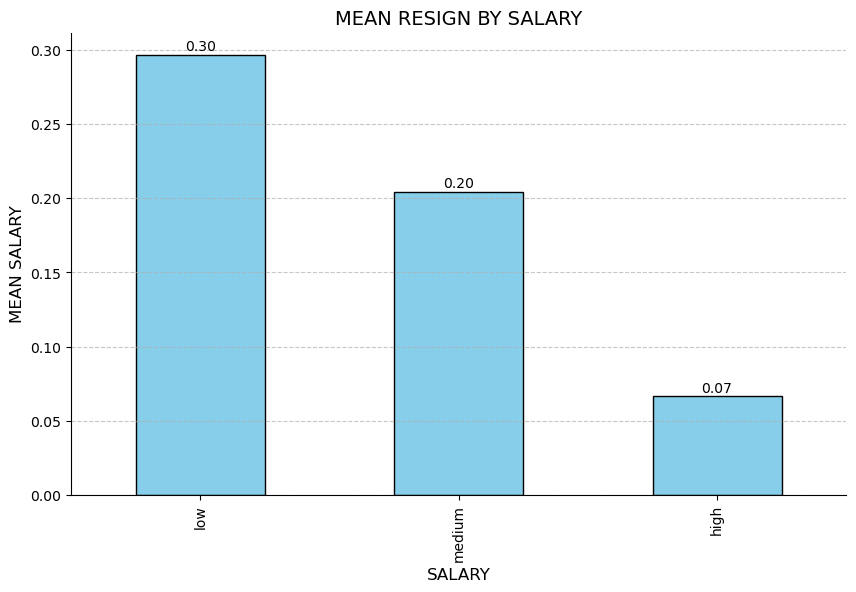

In [17]:
ax = mean_left_by_salary.plot(kind="bar", color="skyblue", edgecolor="black", figsize=(10, 6))

# Add labels and title
ax.set_xlabel("SALARY", fontsize=12)
ax.set_ylabel("MEAN SALARY", fontsize=12)
ax.set_title("MEAN RESIGN BY SALARY", fontsize=14)

# Add grid
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Customize the appearance of the plot
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Add data labels
for i, value in enumerate(mean_left_by_salary):
    ax.text(i, value + 0.001, f"{value:.2f}", ha="center", va="bottom", fontsize=10)

# Show the plot
plt.show()

In [18]:
from ydata_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file = 'output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
prof

In [20]:
df.duplicated().sum() , df.shape[0]

(2981, 14999)

In [21]:
df.drop(columns=["satisfaction_level","last_evaluation","promotion_last_5years"],inplace=True)

In [22]:
df.columns

Index(['number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'left', 'department', 'salary'],
      dtype='object')

In [23]:
from sklearn.preprocessing import OrdinalEncoder

In [24]:
oe = OrdinalEncoder(categories=[["low", "medium", "high"]])
oe.fit(df[["salary"]].values.reshape(-1, 1))

OrdinalEncoder(categories=[['low', 'medium', 'high']])

In [25]:
df["salary"] = oe.transform(df[["salary"]])

C:\Users\walee\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but OrdinalEncoder was fitted without feature names
  warnings.warn(


In [26]:
from sklearn.preprocessing import OneHotEncoder

In [27]:
# split the dataframe into its numerical and categorical components
X_num = df.select_dtypes(exclude='object')
X_cat = df.select_dtypes(include='object')
# create a OneHotEncoder that ignores (0 encodes) unseen categories
# and encode the categorical features for the example dataframe
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X_cat)
# create the names for the one-hot encoded categorical features
categorical_columns = [f'{col}_{cat}' for i, col in enumerate(X_cat.columns) for cat in encoder.categories_[i]]
# put the features into a dataframe and join with the original
# numerical features
one_hot_features = pd.DataFrame(X_encoded, columns=categorical_columns)
df = X_num.join(one_hot_features)

In [28]:
df

,number_project,average_montly_hours,time_spend_company,Work_accident,left,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,2,157,3,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5,262,6,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,7,272,4,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,5,223,5,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2,159,3,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,2,151,3,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14995,2,160,3,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14996,2,143,3,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14997,6,280,4,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 14998
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number_project          14999 non-null  int64  
 1   average_montly_hours    14999 non-null  int64  
 2   time_spend_company      14999 non-null  int64  
 3   Work_accident           14999 non-null  int64  
 4   left                    14999 non-null  int64  
 5   salary                  14999 non-null  float64
 6   department_IT           14999 non-null  float64
 7   department_RandD        14999 non-null  float64
 8   department_accounting   14999 non-null  float64
 9   department_hr           14999 non-null  float64
 10  department_management   14999 non-null  float64
 11  department_marketing    14999 non-null  float64
 12  department_product_mng  14999 non-null  float64
 13  department_sales        14999 non-null  float64
 14  department_support      14999 non-null

<AxesSubplot:>

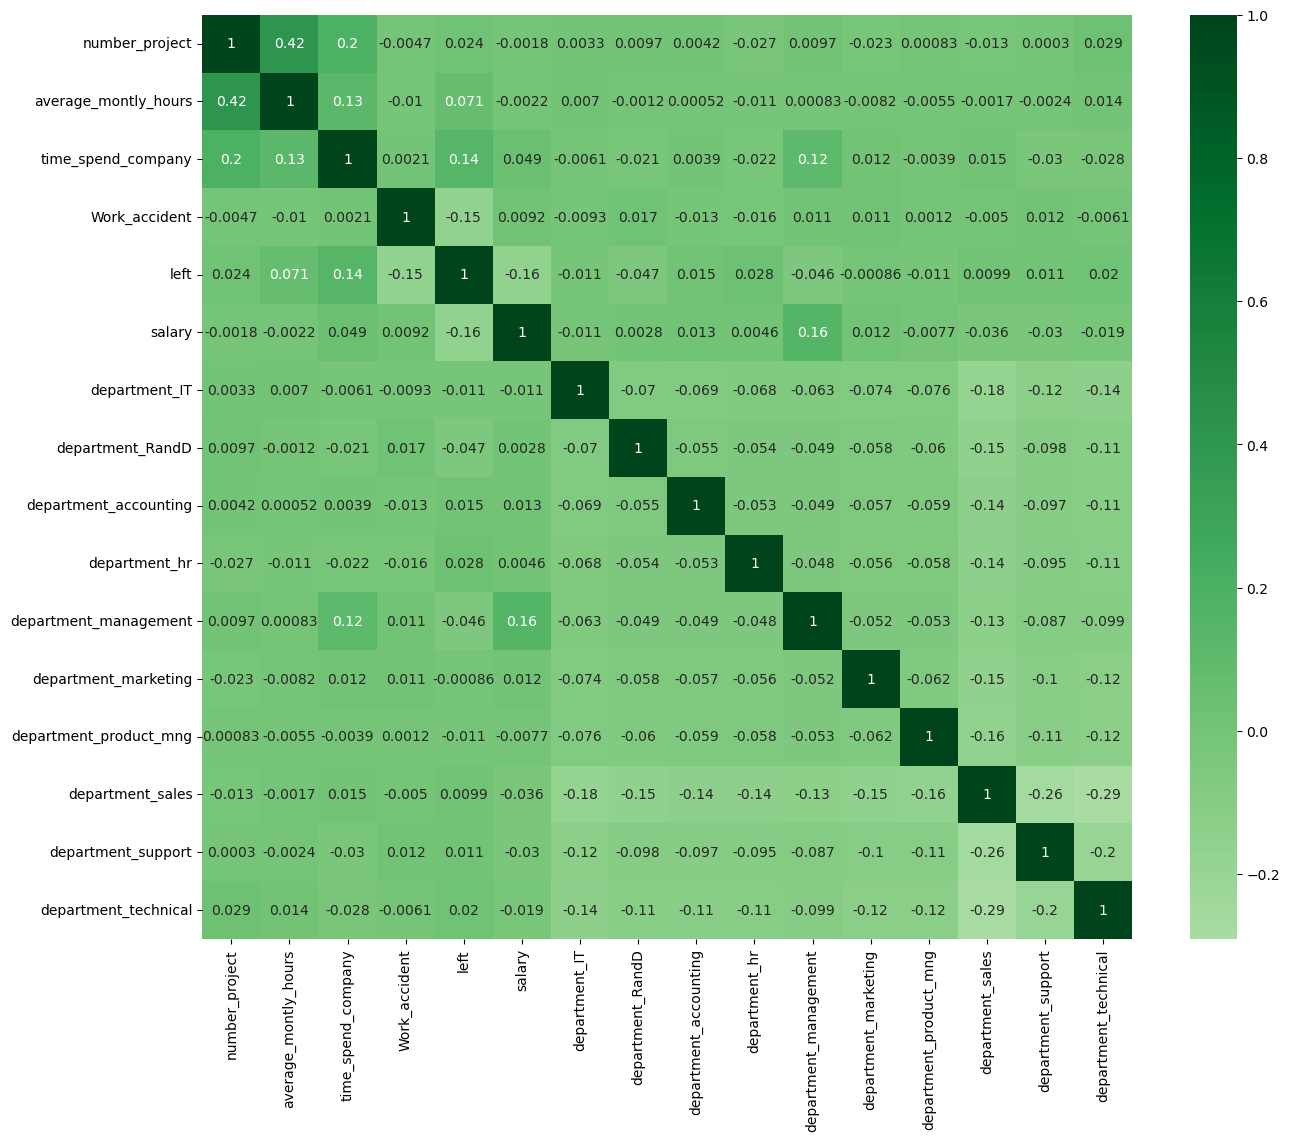

In [30]:
corr = pd.DataFrame(df.corr())
f, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corr,center=0,cmap="Greens",annot=True)

In [31]:
import statsmodels.api as sm
# Function to calculate VIF
def calculate_vif(data):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = df.columns
    for i in range(0, x_var_names.shape[0]):
        y = df[x_var_names[i]]
        x = df[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)

X=df.drop(['left'],axis=1)
calculate_vif(X)

,Var,Vif
13,department_sales,7.19
15,department_technical,5.11
14,department_support,4.30
6,department_IT,2.84
12,department_product_mng,2.34
11,department_marketing,2.28
7,department_RandD,2.17
8,department_accounting,2.16
10,department_management,2.13
9,department_hr,2.07


In [32]:
df.drop("department_IT",axis=1,inplace=True)

### SPLIT THE DATA

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X = df.drop("left",axis=1)
y = df.left

In [35]:
X.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,2,157,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5,262,6,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,7,272,4,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,5,223,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2,159,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [36]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
len(y_train[y_train==0])/11999 , len(y_train[y_train==1])/11999

(0.7612301025085424, 0.23876989749145763)

In [39]:
len(y_test[y_test==0])/3000 , len(y_test[y_test==1])/3000

(0.7646666666666667, 0.23533333333333334)

### MODEL TRAINING

### LogisticRegression

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [41]:
lr = LogisticRegression(max_iter=2000)

In [42]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [43]:
lr_predictions = lr.predict(X_test)

In [44]:
accuracy_score(y_test,lr_predictions)

0.7576666666666667

In [45]:
print(classification_report(y_test,lr_predictions))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86      2294
           1       0.39      0.05      0.09       706

    accuracy                           0.76      3000
   macro avg       0.58      0.51      0.48      3000
weighted avg       0.68      0.76      0.68      3000



In [46]:
cm = confusion_matrix(y_test,lr_predictions)
cm

array([[2235,   59],
       [ 668,   38]], dtype=int64)

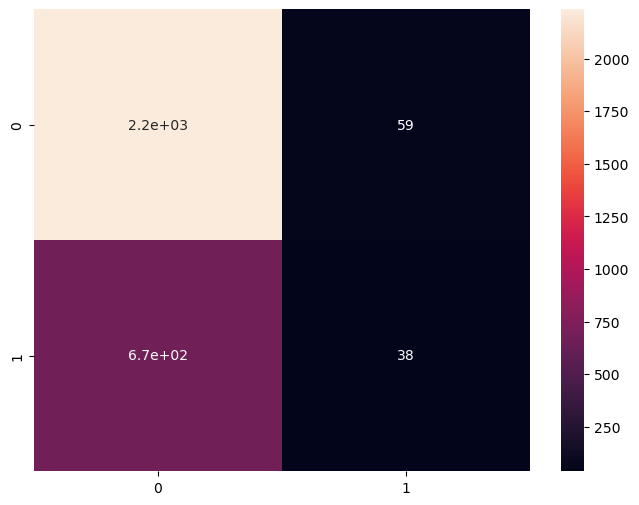

In [47]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True)
plt.tight_layout
plt.show()

### RandomForestClassifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf = RandomForestClassifier()

In [50]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [51]:
rf_predictions = rf.predict(X_test)

In [52]:
accuracy_score(y_test,rf_predictions)

0.9643333333333334

In [53]:
print(classification_report(y_test,rf_predictions))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2294
           1       0.92      0.93      0.92       706

    accuracy                           0.96      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.96      0.96      0.96      3000



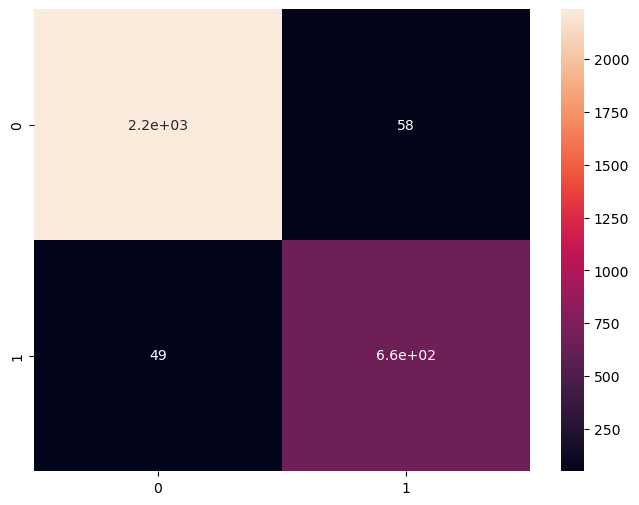

In [54]:
cm = confusion_matrix(y_test,rf_predictions)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True)
plt.tight_layout
plt.show()

### Hyperparameter Tunning

In [55]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [56]:
parameter = {
    'criterion': ["gini", "entropy"],
    "n_estimators": [10, 100, 150, 200],
    "min_samples_leaf": [1, 2, 4, 6],
    "max_features": ["auto", "sqrt", "log2"]
}

In [57]:
kfold = StratifiedKFold(n_splits=5)

In [58]:
clf = GridSearchCV(rf, parameter, scoring="accuracy", n_jobs=2, cv=kfold)

In [59]:
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'n_estimators': [10, 100, 150, 200]},
             scoring='accuracy')

In [60]:
clf.get_params()

{'cv': StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestClassifier(),
 'n_jobs': 2,
 'param_grid': {'criterion': ['gini', 'entropy'],
  'n_estimators': [10, 100, 150, 200],
  'min_samples_leaf': [1, 2, 4, 6],
  'max_features': ['auto', 'sqrt', 'log2']},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 '

In [61]:
clf.best_params_

{'criterion': 'gini',
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 200}

In [62]:
clf.best_score_

0.9652471863276366

In [63]:
clf.score(X_test, y_test) 

0.965

### Save Model

In [64]:
import pickle

In [65]:
with open("model.pkl", "wb") as model_file:
  pickle.dump(clf, model_file)